## Extras

In this notebook we develop some more rigourous statistical tests around the efficient market hypothesis. Assume we are attempting to falsify the null hypothsis, that that the daily market value changes are uncorrelated.

## A few definitions:

### Correlations

* Serial correlation is the relationship between a given variable and itself over various time intervals. Serial correlations are often found in repeating patterns, when the level of a variable effects its future level.
    
    * white noise is “uncorrelated”, which means that each value is independent of the others, and Brownian noise as “correlated”, because each value depends on the preceding value. 

    * A martingale is a sequence of random variables (i.e., a stochastic process) for which, at a particular time in the realized sequence, the expectation of the next value in the sequence is equal to the present observed value even given knowledge of all prior observed values.

    * A necessary (but not sufficient) condition for the martingale hypothesis to hold is that the time series has no autocorrelation, also known as serial correlation, of any order. Note that autocorrelation is sensitive only to linear relationships

* Fama (1970) found that 22 out of the 30 stocks of the Dow Jones Industrial Average exhibited positive daily serial correlation. 

* Returns, rather than price are often used, are used as some of the statistical tests require a stationary variable. 

### Runs test

* The Wald–Wolfowitz runs test (or simply runs test), is a non-parametric statistical test that checks a randomness hypothesis for a two-valued data sequence. More precisely, it can be used to test the hypothesis that the elements of the sequence are mutually independent.

*  In contrast to autocorrelation, the runs test loses information because the magnitude of the returns is lost. However, whilst autocorrelation can detect only linear relationships, the runs test can detect both linear and non-linear relationships.

* If the number of runs is significantly higher or lower than expected, the hypothesis of statistical independence may be rejected. Consider the DJIA closing prices. There is no need to detrend the data. A run is a consecutive sequence of returns above (below) the mean return. The above runs test is performed on daily, weekly, monthly and annual returns, in chronological order.

Under the null hypothesis, the number of runs in a sequence of $N$ elements is a random variable whose conditional distribution given the observation of $N_+$ positive values and $N_−$ negative values $(N = N_+ + N_−)$ is approximately normal, with

mean: $\mu ={\frac  {2\ N_{+}\ N_{-}}{N}}+1\,$

std: $\sigma ^{2}={\frac  {2\ N_{+}\ N_{-}\ (2\ N_{+}\ N_{-}-N)}{N^{2}\ (N-1)}}={\frac  {(\mu -1)(\mu -2)}{N-1}}\,$

The test statistic is

$$ Z= \frac{R−\mu}{\sigma} $$

where R is the observed number of runs.


For a large-sample runs testm the test statistic is compared to a standard normal table. That is, at the 5% significance level, a test statistic with an absolute value greater than 1.96 indicates non-randomness.

In [104]:
import numpy as np
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [115]:
def polynomial_detrend(data, order, plot=False):
    """
    Removes a polynomial trend from the data.

    :param data: The data to detrend. Will be modified in-place.
    :type data: :class:`numpy.ndarray`
    :param order: The order of the polynomial to fit.
    :type order: int
    :param plot: If True, a plot of the operation happening will be shown.
        If a string is given that plot will be saved to the given file name.
    :type plot: bool or str
    """
    # Convert data if it's not a floating point type.
    if not np.issubdtype(data.dtype, float):
        data = np.require(data, dtype=np.float64)

    x = np.arange(len(data))
    fit = np.polyval(np.polyfit(x, data, deg=order), x)

    data -= fit
    return data

In [118]:
data = numpy.loadtxt('nasdaq.csv')

detrend = True
if detrend:
    #data = simple_detrend(data)
    data = polynomial_detrend(data, 3)

follow = data[:-1] < data[1:]
seq = follow[:-1] == follow[1:]




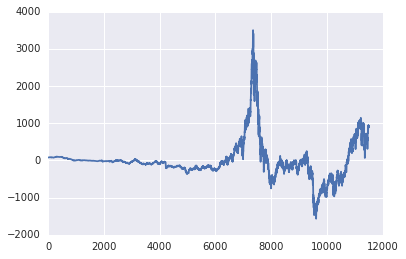

In [119]:
plt.plot(data)

## Autocorrelation

In [120]:
def serial_corr(sig, lag=1):
    n = len(sig)
    y1 = sig[lag:]
    y2 = sig[:n-lag]
    corr = np.corrcoef(y1, y2, ddof=0)[0, 1]
    return corr

In [121]:
coors = []
for i in range(1,10):
    coors.append(serial_corr(follow ,  lag=int(i)))

<Container object of 9 artists>

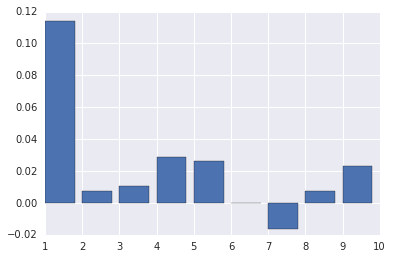

In [122]:
plt.bar(range(1,10), coors)

In [123]:
#test on random data
np.random.seed(22)

test = np.random.randint(0,2,len(follow))
serial_corr(test)

0.00067931358868055186

In [124]:
coors = []
for i in range(1, 10):
    coors.append(serial_corr(test,  lag=i))

<Container object of 9 artists>

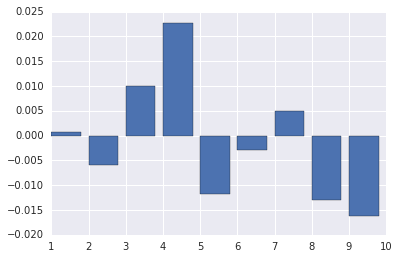

In [125]:
plt.bar(range(1, 10), coors)

## Runs test

First we need to count the number of 'runs' in our dataset

In [128]:
#It detects where chunks begin and compute differences between chunk starts and
runs = np.diff(np.where(follow[:-1] != follow[1:]))

In [137]:
#alternatively
runstart = np.nonzero(np.diff(np.r_[[-np.inf], follow, [np.inf]]))[0]
runs =  np.diff(runstart)

(array([  2.23200000e+03,   1.23700000e+03,   0.00000000e+00,
          7.42000000e+02,   0.00000000e+00,   3.77000000e+02,
          2.12000000e+02,   0.00000000e+00,   1.15000000e+02,
          0.00000000e+00,   6.70000000e+01,   4.40000000e+01,
          0.00000000e+00,   2.10000000e+01,   0.00000000e+00,
          1.00000000e+01,   7.00000000e+00,   0.00000000e+00,
          5.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  1. ,   1.6,   2.2,   2.8,   3.4,   4. ,   4.6,   5.2,   5.8,
          6.4,   7. ,   7.6,   8.2,   8.8,   9.4,  10. ,  10.6,  11.2,
         11.8,  12.4,  13. ,  13.6,  14.2,  14.8,  15.4,  16. ]),
 <a list of 25 Patch objects>)

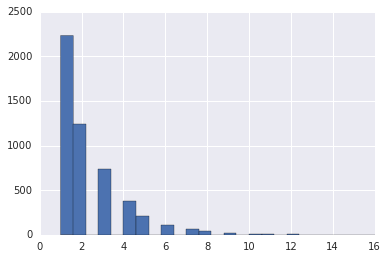

In [148]:
plt.hist(runs, bins=25)

In [139]:
from scipy import stats

class Runs(object):
    
    '''class for runs in a binary sequence


    Parameters
    ----------
    x : array_like, 1d
        data array,


    Notes
    -----
    This was written as a more general class for runs. This has some redundant
    calculations when only the runs_test is used.

    TODO: make it lazy

    The runs test could be generalized to more than 1d if there is a use case
    for it.

    This should be extended once I figure out what the distribution of runs
    of any length k is.

    The exact distribution for the runs test is also available but not yet
    verified.

    '''

    def __init__(self, x):
        self.x = np.asarray(x)

        self.runstart = runstart = np.nonzero(np.diff(np.r_[[-np.inf], x, [np.inf]]))[0]
        self.runs = runs = np.diff(runstart)
        self.runs_sign = runs_sign = x[runstart[:-1]]
        self.runs_pos = runs[runs_sign==1]
        self.runs_neg = runs[runs_sign==0]
        self.runs_freqs = np.bincount(runs)
        self.n_runs = len(self.runs)
        self.n_pos = (x==1).sum()

    def runs_test(self, correction=True):
        '''basic version of runs test

        Parameters
        ----------
        correction: bool
            Following the SAS manual, for samplesize below 50, the test
            statistic is corrected by 0.5. This can be turned off with
            correction=False, and was included to match R, tseries, which
            does not use any correction.

        pvalue based on normal distribution, with integer correction

        '''
        self.npo = npo = (self.runs_pos).sum()
        self.nne = nne = (self.runs_neg).sum()

        #n_r = self.n_runs
        n = npo + nne
        npn = npo * nne
        rmean = 2. * npn / n + 1 #expected number of runs
        rvar = 2. * npn * (2.*npn - n) / n**2. / (n-1.)
        rstd = np.sqrt(rvar)    #expected standard deviation
        rdemean = self.n_runs - rmean #observed minus expected number of runs
        if n >= 50 or not correction:
            z = rdemean
        else:
            if rdemean > 0.5:
                z = rdemean - 0.5
            elif rdemean < 0.5:
                z = rdemean + 0.5
            else:
                z = 0.

        z /= rstd
        pval = 2 * stats.norm.sf(np.abs(z))
        return z, pval

In [145]:
runguy = Runs(follow)

In [152]:
print('run frequencies are:', runguy.runs_freqs)
print('number of runs are:', runguy.n_runs)

('run frequencies are:', array([   0, 2232, 1237,  742,  377,  212,  115,   67,   44,   21,   10,
          7,    5,    2,    0,    0,    2]))
('number of runs are:', 5073)


In [146]:
runguy.runs_test()

(-12.254282776544978, 1.5935293720600122e-34)

In [147]:
len(runguy.runs_pos)

2537